# Looking at air quality in Leuven to help outside athletes: runners and cyclists

** Problem definition: **
- 1: What are the dangers of air polution for outdoor athletes / people in general?
- 2: Where do outside athletes run and cycle in and near Leuven?
- 3: Does air polution change across time and place? 
- 4: If so: can we make athletes aware of the air polution dangers and help them in scheduling their runs at different times or places?
- 5: How much air polution do outdoor athletes receive from doing sports in and around Leuven? 

# 1. What are the dangers of air polution for outdoor athletes / people in general?

#### ** Health effects **
<img src="../../pics/1_healtheffects.jpg" />

#### ** Sources of air pollution **
<img src="../../pics/1_sourcesairpol.jpg" />

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3155438/

#### ** Particular matter is the measure in our air quality dataset. PM2.5 measurements are more accurate than PM10, so we'll use that. What are its sources? **


** Sources of PM2.5: **

** Human-made sources of PM2.5 are more important than natural sources, which make only a small contribution to the total concentration. ** Within UK towns and cities, emissions of PM2.5 from road vehicles are an important source. Consequently, levels of PM2.5 (and population exposure) close to roadsides are often much higher than those in background locations. In some places, industrial emissions can also be important, as can the use of non-smokeless fuels for heating and other domestic sources of smoke such as bonfires. Under some meteorological conditions, air polluted with PM2.5 from the continent may circulate over the UK – a condition known as the long range transportation of air pollution. Long range transport, together with pollution from local sources, can result in short term episodes of high pollution which might have an impact on the health on those sensitive to high pollution.

Source: https://laqm.defra.gov.uk/public-health/pm25.html


# 2. Where do outside athletes run and cycle in and near Leuven?

In [1]:
# Load libs 
import os, sys
import pandas as pd
import numpy as np
import datetime

# Load data
meta = pd.read_csv('../../data/air/leuvenair_meta.csv') 
df = pd.read_csv('../../data/air/leuvenair.csv', skiprows=1, header = None)
column_list = ['date', 'lat', 'lon', 'sensor_id', 'pm2.5', 'pm10', 'dhtid', 'temperature', 'humidity', 'obsid']
df.columns = column_list
df['date'] = pd.to_datetime(df['date'])


#remove outliers that make no sense
df = df.loc[df['pm2.5'] < 999]

In [2]:
df.sample(5)

,date,lat,lon,sensor_id,pm2.5,pm10,dhtid,temperature,humidity,obsid
1783255,2018-03-26 12:35:32,50.88939,4.7311,9635,6.53,10.93,9636.0,23.0,20.6,1891586
3288969,2018-04-28 09:45:50,50.86678,4.7105,9637,2.80,3.93,9638.0,15.7,80.2,3435759
3942445,2018-05-11 15:06:29,50.90098,4.6726,9801,7.80,11.03,9802.0,24.6,60.4,4104947
2425453,2018-04-09 20:48:04,50.86919,4.7067,8807,37.83,60.20,8808.0,16.3,74.2,2550638
4554684,2018-05-23 21:56:50,50.85952,4.6474,9559,35.17,38.90,9560.0,17.2,99.9,4717186


## Strava heatmap: Cyclists
Strava heatmap from: https://www.strava.com/heatmap#13.45/4.71175/50.87019/blue/all

<img src="../../pics/strava_bikers.jpg" />

## Strava heatmap for runners

<img src="../../pics/strava_runners.jpg" />

In [3]:
#areas of interest: sensors nearby
kessel_lo = [9643, 8789, 12609, 6561, 8803, 9587, 8789, 8835, 11201, 8833, 8779, 9635, 8801]
vaartkom = [8829, 8809, 9569]
abdij_vh_park = [8839, 9567, 9637, 12855]
arenbergpark = [12505, 9561, 10739, 8769, 9609, 9583]
stad = [8821, 9825, 9605, 9591, 8837, 11529, 8993]

clusters = [kessel_lo, vaartkom, abdij_vh_park, arenbergpark, stad]

<img src="../../pics/strava_runners_clusters.jpg" />

## How many sensors do we have around these clusters?

#### ** Arenbergpark **

<img src="../../pics/sensors_arenberg.jpg" />

#### ** City **

<img src="../../pics/sensors_city.jpg" />

#### ** Kessel Lo: Provinciedomein and Heuvelhof  **

<img src="../../pics/sensors_kessel_lo.jpg" />

#### ** Vaartkom **

<img src="../../pics/sensors_vaartkom.jpg" />

#### ** Abdij VH park **

<img src="../../pics/sensors_abdijvhpark.jpg" />

## How much data do we have?

In [4]:
#check datapoints
for i, cluster in enumerate(clusters):
    print(['kessel_lo', 'vaartkom', 'abdij_vh_park', 'arenbergpark', 'stad'][i])
    print(df.loc[df['sensor_id'].isin(cluster), 'sensor_id'].value_counts().sum(), ' total datapoints')

kessel_lo
700761  total datapoints
vaartkom
151119  total datapoints
abdij_vh_park
207769  total datapoints
arenbergpark
248945  total datapoints
stad
387103  total datapoints


In [5]:
for i, cluster in enumerate(clusters):
    print(['kessel_lo', 'vaartkom', 'abdij_vh_park', 'arenbergpark', 'stad'][i])
    for sensor in cluster:
        print('sensor: ', sensor)
        print(df.loc[(df['sensor_id'] == sensor)].date.min())

kessel_lo
sensor:  9643
2018-02-20 22:20:20
sensor:  8789
2018-02-02 15:26:18
sensor:  12609
2018-04-23 17:13:06
sensor:  6561
2018-01-30 00:00:27
sensor:  8803
2018-02-01 21:42:04
sensor:  9587
2018-03-12 18:46:15
sensor:  8789
2018-02-02 15:26:18
sensor:  8835
2018-02-01 21:41:53
sensor:  11201
2018-03-20 19:57:22
sensor:  8833
2018-02-03 07:32:32
sensor:  8779
2018-02-13 16:26:06
sensor:  9635
2018-02-09 08:54:55
sensor:  8801
2018-02-25 21:45:55
vaartkom
sensor:  8829
2018-02-06 22:19:03
sensor:  8809
2018-02-07 15:57:09
sensor:  9569
2018-04-15 14:24:13
abdij_vh_park
sensor:  8839
2018-01-31 14:47:33
sensor:  9567
2018-02-14 17:30:10
sensor:  9637
2018-02-08 09:08:25
sensor:  12855
2018-05-01 10:11:03
arenbergpark
sensor:  12505
2018-04-20 14:12:47
sensor:  9561
2018-02-08 18:27:16
sensor:  10739
2018-05-14 09:44:08
sensor:  8769
2018-04-22 11:15:17
sensor:  9609
2018-02-11 18:47:43
sensor:  9583
2018-03-12 20:20:52
stad
sensor:  8821
2018-02-16 16:55:24
sensor:  9825
2018-02-12 1

# 3. Does air polution change across time and place? 

## 3.1 Time

In [6]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['hour'] = df.date.dt.hour
df['weekday'] = df.date.dt.weekday

In [7]:
import seaborn as sns

In [8]:
df.groupby(['month'])['pm2.5'].mean()

month
1     6.944987
2    14.570615
3    14.463531
4    14.561399
5    14.143205
6    22.561510
Name: pm2.5, dtype: float64

In [9]:
df.groupby(['hour'])['pm2.5'].mean()

hour
0     18.245539
1     19.121901
2     20.191242
3     20.285520
4     20.647259
5     20.296393
6     19.004245
7     17.846040
8     16.459357
9     15.047517
10    13.311878
11    11.682717
12    10.842508
13    10.288964
14     9.622501
15     9.388094
16     9.615212
17    10.179745
18    11.290581
19    12.689340
20    14.125103
21    15.412332
22    16.503327
23    17.263004
Name: pm2.5, dtype: float64

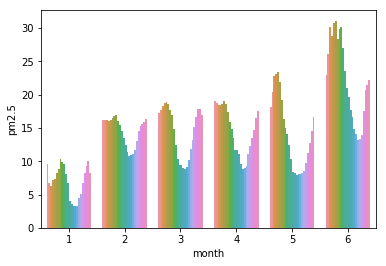

In [10]:
month_hour_df = df.groupby(['month', 'hour'])['pm2.5'].mean().reset_index()
sns.barplot(x = month_hour_df['month'], y = month_hour_df['pm2.5'], hue = month_hour_df['hour']).legend_.remove()

Pollution seems to be the lowest during daytime: 10AM - 6PM. Are these numbers reliable? Check options data to verify

In [11]:
# read in option data to verify
option = pd.read_csv('../../data/air/optionair.csv') 
option = option.loc[option['time'] != 'time']
option['time'] = option['time'].astype(int)
option['time'] = pd.to_datetime(option['time'], unit='ns')

option['year'] = option.time.dt.year
option['month'] = option.time.dt.month
option['day'] = option.time.dt.day
option['hour'] = option.time.dt.hour
option['weekday'] = option.time.dt.weekday

In [12]:
option.part_2_5.isnull().sum() / len(option)

0.17098055138421248

In [13]:
option.part_2_5 = option.part_2_5.fillna(0)
option.part_2_5 = option.part_2_5.astype(float)

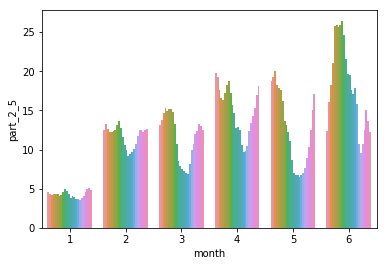

In [14]:
#month_hour_df_option = option.groupby(['month', 'hour'])['part_2_5'].mean().reset_index()
#sns.barplot(x = month_hour_df_option['month'], y = month_hour_df_option['part_2_5'], hue = month_hour_df_option['hour']).legend_.remove()

option_nozero = option.loc[(option.time.dt.year == 2018) & (option.part_2_5 != 0)]
month_hour_df_option = option_nozero.groupby(['month', 'hour'])['part_2_5'].mean().reset_index()
sns.barplot(x = month_hour_df_option['month'], y = month_hour_df_option['part_2_5'], hue = month_hour_df_option['hour']).legend_.remove()

## 3.2 Place

In [15]:
def apply_cluster(x):
    k = -1
    for i, cluster in enumerate(clusters):
        if x in cluster:
            k = i
    
    return k

In [16]:
df['cluster'] = df['sensor_id'].apply(lambda x: apply_cluster(x))

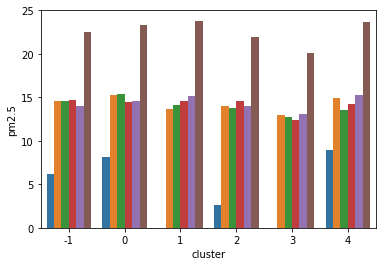

In [17]:
cluster_month_df = df.groupby(['cluster', 'month'])['pm2.5'].mean().reset_index()
sns.barplot(x = cluster_month_df['cluster'], y = cluster_month_df['pm2.5'], hue = cluster_month_df['month']).legend_.remove()

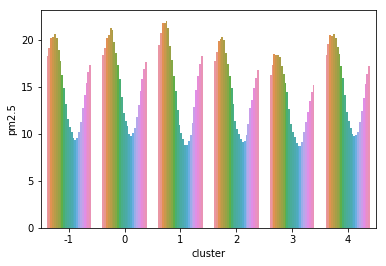

In [18]:
cluster_month_df = df.groupby(['cluster', 'hour'])['pm2.5'].mean().reset_index()
sns.barplot(x = cluster_month_df['cluster'], y = cluster_month_df['pm2.5'], hue = cluster_month_df['hour']).legend_.remove()

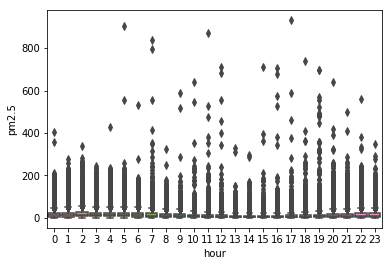

In [19]:
sns.boxplot(x = df['hour'], y = df['pm2.5'])

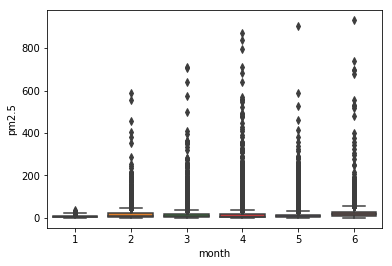

In [20]:
sns.boxplot(x = df['month'], y = df['pm2.5'])

(0, 100)

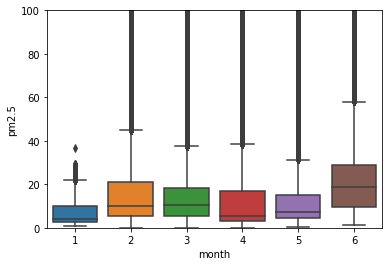

In [21]:
sns.boxplot(x = df['month'], y = df['pm2.5']).set_ylim([0, 100]) 

(0, 100)

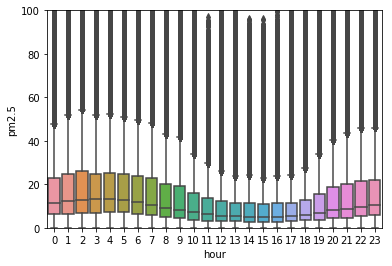

In [22]:
sns.boxplot(x = df['hour'], y = df['pm2.5']).set_ylim([0, 100]) 

In [23]:
df.loc[df['pm2.5'] > 999].date.dt.month.value_counts()

Series([], Name: date, dtype: int64)

In [24]:
df.temperature.describe()

count    4.984109e+06
mean     1.574592e+01
std      3.989495e+01
min     -1.040000e+01
25%      6.800000e+00
50%      1.280000e+01
75%      1.890000e+01
max      9.472000e+02
Name: temperature, dtype: float64

In [25]:
df.loc[df['pm2.5'] > 999, 'sensor_id']

Series([], Name: sensor_id, dtype: int64)

# 4. If so: can we make athletes aware of the air polution dangers and help them in scheduling their runs at different times or places?

** Quick thoughts for some app integrations into strava or other cardio apps: **

- strava stats on air quality during your run
- route recommendations based on historic data
- some inbuild metric : "Air Quality predictions for the next hour": Perfect / Very good / good / bad / you're gonna die in the next 10 years


# 5. How much air polution do outdoor athletes receive from doing sports in and around Leuven? 

<img src="../../pics/fakerunner.jpg" />

In [73]:
def calculate_pm25_exposure_run(df, start_time, end_time):

    sub_df = df.loc[(df['date'] > start_time) & (df['date'] < end_time)] 
    mean_dosage = sub_df['pm2.5'].mean()
    
    return mean_dosage

In [87]:
calculate_pm25_exposure_run(df, '2018-04-01 06:00', '2018-04-01 07:00')

21.34650243638332

In [91]:
import gpxpy

In [92]:
def parsegpx(f):
    #Parse a GPX file into a list of dictoinaries.  
    #Each dict is one row of the final dataset
    
    points2 = []
    with open(f, 'r') as gpxfile:
        # print f
        gpx = gpxpy.parse(gpxfile)
        for track in gpx.tracks:
            for segment in track.segments:
                for point in segment.points:
                    dict = {'Timestamp' : point.time,
                            'Latitude' : point.latitude,
                            'Longitude' : point.longitude,
                            'Elevation' : point.elevation
                            }
                    points2.append(dict)
    return points2   

In [96]:
gpx_lst = parsegpx('../../data/gpx/ring-FakeRunner.gpx')

In [99]:
gpx_df = pd.DataFrame(gpx_lst)

In [101]:
from math import cos, asin, sqrt

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

def closest(data, v):
    return min(data, key=lambda p: distance(v['lat'],v['lon'],p['lat'],p['lon']))

#print(closest(tempDataList, v))

{'lat': 39.7612992, 'lon': -86.1519681}


In [107]:
sensor_df = df.groupby('sensor_id').last().reset_index()[['sensor_id', 'lat', 'lon']]

In [115]:
dct = sensor_df.T.to_dict().values()

In [131]:
print(closest(dct, v))

{'sensor_id': 6561.0, 'lat': 50.889959999999995, 'lon': 4.7214}


In [130]:
v = {'lat': 50.889, 'lon': 4.7214}

In [145]:
def get_polution(x):
    v = {'lat': x['Latitude'], 'lon': x['Longitude']}
    return closest(dct, v)['sensor_id']
    
    

In [148]:
df = df.set_index(df['date'])

In [156]:
gpx_df.iloc[0, 3]

Timestamp('2018-05-28 20:00:00')

In [158]:
test = gpx_df.iloc[0, 3]

In [167]:
test.

'2018-05-28 20:00:00'

In [170]:
gpx_df.iloc[0,3].to_pydatetime().strftime("%Y-%m-%d %H:%M:%S")

'2018-05-28 20:00:00'

In [ ]:
df.iloc[df.index.get_loc(dt, method='nearest')]

In [178]:
for row in range(len(gpx_df)):
    
    sensor_id = get_polution(gpx_df.iloc[row])
    df_sub = df.loc[df['sensor_id'] == sensor_id]
    ts = gpx_df.iloc[row, 3].to_pydatetime().strftime("%Y-%m-%d %H:%M:%S")
    newrow = df_sub.iloc[df_sub.index.get_loc(ts, method='nearest')]
    print(newrow['date'])
    print(newrow['pm2.5'])
    

2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00:33
5.6
2018-05-28 20:00

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [132]:
gpx_df

,Elevation,Latitude,Longitude,Timestamp
0,24.23,50.872414,4.689531,2018-05-28 20:00:00
1,24.23,50.872394,4.689573,2018-05-28 20:00:00
2,24.23,50.872374,4.689615,2018-05-28 20:00:01
3,24.23,50.872354,4.689656,2018-05-28 20:00:02
4,24.23,50.872334,4.689698,2018-05-28 20:00:03
5,24.23,50.872314,4.689739,2018-05-28 20:00:05
6,24.23,50.872294,4.689781,2018-05-28 20:00:06
7,24.23,50.872274,4.689822,2018-05-28 20:00:07
8,24.23,50.872254,4.689864,2018-05-28 20:00:09
9,24.23,50.872234,4.689906,2018-05-28 20:00:10


# 6. Lessons learned
## 6.1 What i learned 
- Time is an important variable for PM2.5
- Location doesnt seem to be an important variable for predicting PM2.5
- aggregated sensor data from leuvenair seem to follow the same patterns as the option sensor data. So to get a high level overview of the air quality (PM2.5) in leuven, leuvenair data should be ok. 

## 6.2 Advice for the runners
- Best time to run is between 12:00 -> 18:00 (according to the PM2.5 data)
- if you want to find a future run buddy: run in parks

## 6.3 Future data recommendations
- More sensors would be nice, also at popular places such as parks, busy highways and tourist places
- Ozone sensor  data should be captured. High ozone concentrations seem to occur during summer and when its warm -> more runners during summer outside... Maybe geolocation for this part of air polution is more important than PM2.5


## 6.4 Things you could do with this strava data
- The city of leuven could get data from people who run or cycle in Leuven and could make data driven decisions with this:
- To give 1 example: when it's dark and theres a place where a lot of people run: is there a lot of street lights?